In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [6]:
df_glass = pd.read_csv("glass.csv")
df_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Зададим зависимую переменную и независимые переменные

In [45]:
X = df_glass.drop(columns=["Type"])
y = df_glass["Type"]

In [9]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

Стандартизируем данные

In [46]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

X_std = pd.DataFrame(X_std, columns=X.columns)
X_std

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


Разделим выборку на обучающую и тестовую в соотношении 6:4

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

Обучим дерево решений 

Лучшие параметры: {'ccp_alpha': 0.02, 'criterion': 'gini'}
accurancy = 0.7093023255813954


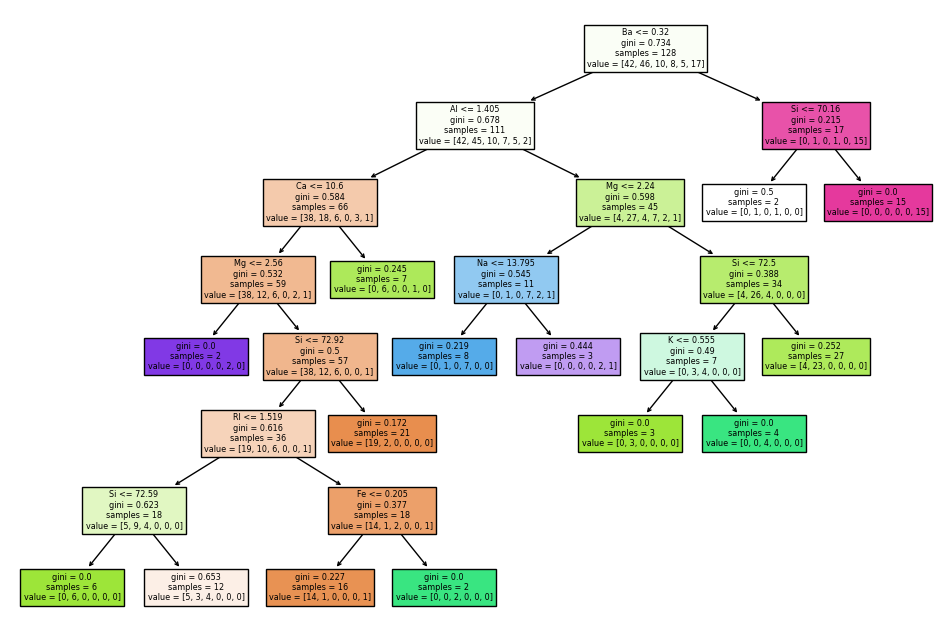

In [10]:
params = {"criterion" : ["entropy", "gini"],
          "ccp_alpha" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.8]} # сетка параметров модели

clf_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(clf_tree, params)
grid_search.fit(X_train, y_train)

best_clf_tree = grid_search.best_estimator_

print("Лучшие параметры:" , grid_search.best_params_)
print("accuracy =", best_clf_tree.score(X_test, y_test) )

best_clf_tree = grid_search.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_clf_tree, filled=True, feature_names=X.columns)
plt.show()

Считаем другие данные

In [37]:
column_names = [
    "FixedAcidity", "VolatileAcidity", "CitricAcid", "ResidualSugar", "Chlorides",
    "FreeSulfurDioxide", "TotalSulfurDioxide", "Density", "PH", "Sulphates", "Alcohol", "Quality"
]

df_wine = pd.read_csv(
    "winequality-red.dat",
    comment='@',
    header=None,  
    names=column_names,  
    skip_blank_lines=True  
)

df_wine

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
df_wine["Quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Quality, dtype: int64

Зададим зависимую переменную и независимые переменные

In [39]:
X = df_wine.drop(columns="Quality")
y = df_wine["Quality"]

In [40]:
X

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [41]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: Quality, Length: 1599, dtype: int64

Стандартизируем X

In [42]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

X_std

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


Используем метод главных компанент 

In [43]:
pca = PCA()
pca = pca.fit(X_std)

np.cumsum(pca.explained_variance_ratio_)

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

Т.о. 95% информативнсти будут описывать 9 компонент

In [44]:
pca.explained_variance_ # Метод Кайзера

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138, 0.34485779, 0.18144664,
       0.05959558])

Отбираем те компаненты, которые имеют оценку > 1 => по критерию Кайзера отбираем 4 компаненты 

Подготовим df в котором будут данные после 
обработки методом главных компонент с критерий 95% значимости

In [45]:
pca1 = PCA(n_components=9)
pca1.fit(X_std.iloc[:, :9])


X_pca1 = pca1.transform(X_std.iloc[:, :9])
X_pca1 = pd.DataFrame(X_pca1, columns=["Comp. №" + str(i) for i in range(1, 10)])

X_pca1

,Comp. №1,Comp. №2,Comp. №3,Comp. №4,Comp. №5,Comp. №6,Comp. №7,Comp. №8,Comp. №9
0,-1.648058,-0.462972,1.267489,-0.421412,-0.344315,-0.857842,-0.025021,-0.406525,0.061837
1,-1.001323,1.273149,1.505070,0.573207,-1.127369,0.876089,-0.587104,0.033286,-0.130153
2,-0.863574,0.259235,1.238802,0.307515,-0.746411,0.502771,-0.178264,-0.341497,-0.054441
3,2.522406,-0.099814,-1.275570,-0.093776,-0.689848,-0.365596,0.138341,-0.062558,0.270927
4,-1.648058,-0.462972,1.267489,-0.421412,-0.344315,-0.857842,-0.025021,-0.406525,0.061837
...,...,...,...,...,...,...,...,...,...
1594,-2.160641,0.842148,-0.387887,0.489121,0.108123,-0.265624,-0.889682,0.481747,-0.185903
1595,-2.413612,1.399527,-0.917342,-0.101305,0.067725,-0.648632,-0.998500,0.618108,-0.337353
1596,-1.613825,0.624207,-0.567834,0.024322,0.252942,-0.322130,-0.821357,0.154074,-0.426367
1597,-2.503871,0.893393,-0.245432,0.028061,0.120325,-0.860875,-0.526424,0.752774,-0.324979


Подготовим df в котором будут данные после обработки методом главных компонет с критерием Критерий Кайзера

In [46]:
pca2 = PCA(n_components=4)
pca2.fit(X_std.iloc[:, :4])


X_pca2 = pca2.transform(X_std.iloc[:, :4])
X_pca2 = pd.DataFrame(X_pca2, columns=["Comp. №" + str(i) for i in range(1, 5)])

X_pca2

,Comp. №1,Comp. №2,Comp. №3,Comp. №4
0,-1.739973,-0.097982,-0.401199,-0.384587
1,-2.026003,0.720048,-1.116774,-0.166437
2,-1.597675,0.290128,-0.713946,-0.246008
3,2.501777,-0.815517,-0.279261,-0.247809
4,-1.739973,-0.097982,-0.401199,-0.384587
...,...,...,...,...
1594,-1.577110,-0.281000,0.424499,0.083823
1595,-1.449297,-0.256580,0.768257,0.141346
1596,-1.100071,-0.252691,0.795486,0.047550
1597,-1.663264,-0.216669,0.338453,0.424602


Разделим X_std, X_pca1, X_pca2 на обучающую и тестовую выборки в соотношении 6 к 4

In [53]:
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y, test_size=0.4, stratify=y)

X_pca1_train, X_pca1_test, y_pca1_train, y_pca1_test = train_test_split(X_pca1, y, test_size=0.4)

X_pca2_train, X_pca2_test, y_pca2_train, y_pca2_test = train_test_split(X_pca2, y, test_size=0.4)


Для каждого из трёх вариантов построим дерево решений и проанализируйте его 
эффективность

In [54]:
params = {"criterion" : ["entropy", "gini"],
          "ccp_alpha" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.8]} # сетка параметров модели

Лучшие параметры: {'ccp_alpha': 0.005, 'criterion': 'entropy'}
accurency = 0.575


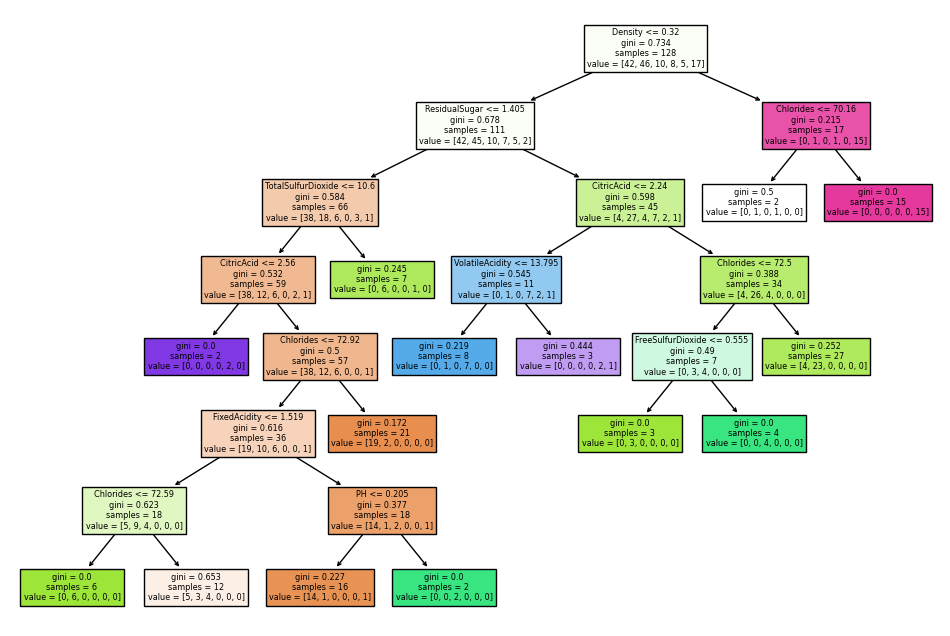

In [56]:
# Модель обученная на X_std

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, params)
grid_search.fit(X_std_train, y_std_train)


best_clf = grid_search.best_estimator_
std_score = best_clf.score(X_std_test, y_std_test)


print("Лучшие параметры:" , grid_search.best_params_)
print("accuracy =", std_score)

plt.figure(figsize=(12, 8))
plot_tree(best_clf_tree, filled=True, feature_names=X.columns)
plt.show()

Лучшие параметры: {'ccp_alpha': 0.005, 'criterion': 'entropy'}
accurency = 0.5328125


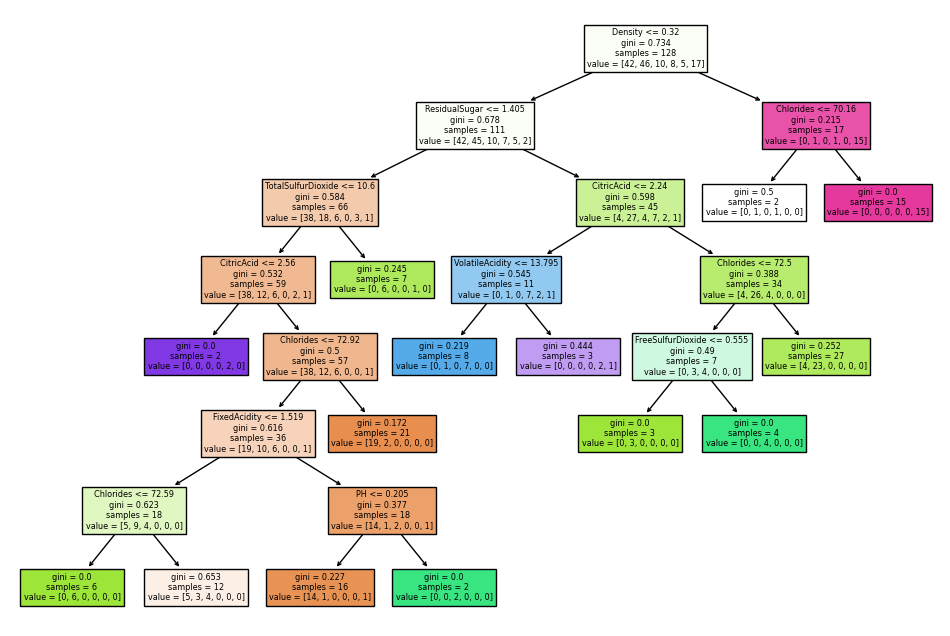

In [57]:
# Модель обученная на X_pca1

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, params)
grid_search.fit(X_pca1_train, y_pca1_train)


best_clf = grid_search.best_estimator_
pca1_score = best_clf.score(X_pca1_test, y_pca1_test)

print("Лучшие параметры:" , grid_search.best_params_)
print("accuracy =", pca1_score)

plt.figure(figsize=(12, 8))
plot_tree(best_clf_tree, filled=True, feature_names=X.columns)
plt.show()

Лучшие параметры: {'ccp_alpha': 0.005, 'criterion': 'entropy'}
accurency = 0.4734375


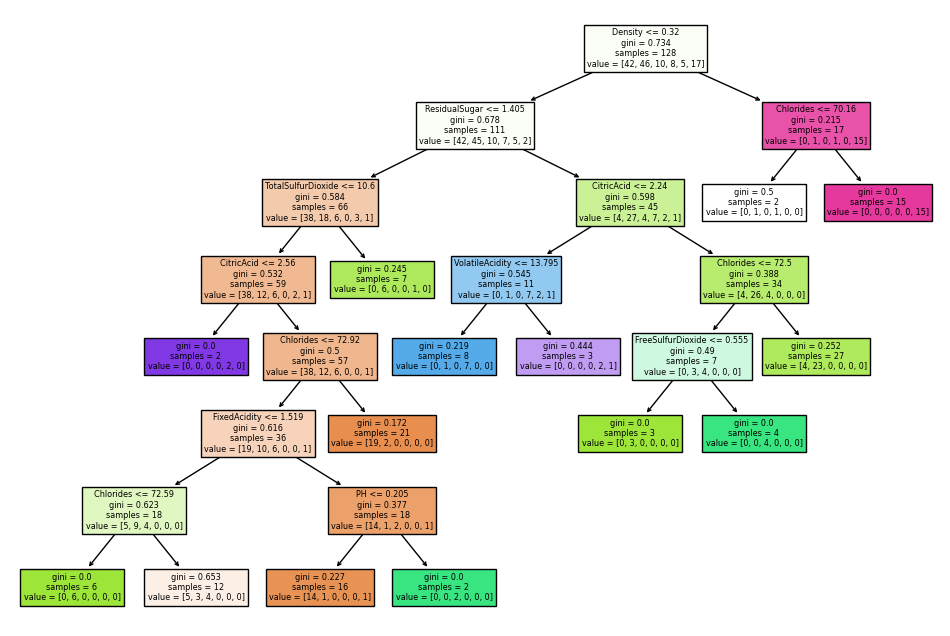

In [58]:
# Модель обученная на X_pca2

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, params)
grid_search.fit(X_pca2_train, y_pca2_train)

best_clf = grid_search.best_estimator_
pca2_score = best_clf.score(X_pca2_test, y_pca2_test)

print("Лучшие параметры:" , grid_search.best_params_)
print("accuracy =", pca2_score)

plt.figure(figsize=(12, 8))
plot_tree(best_clf_tree, filled=True, feature_names=X.columns)
plt.show()

In [59]:
print("Accurency для модели обученной на обычных данных : ", std_score)
print("Accurency для модели обученной на первых 9 главных компонентах: ", pca1_score)
print("Accurency для модели обученной на первых 4 главных компонентах: ", pca2_score)

Accurency для модели обученной на обычных данных :  0.575
Accurency для модели обученной на первых 9 главных компонентах:  0.5328125
Accurency для модели обученной на первых 4 главных компонентах:  0.4734375


Т.о. модель обученная на обычных данных оказалась лучшей, т.к. при построении главных компанент была потеряна часть информации  